In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



A =  2.569478705932974
B =  -0.003750640702510899
std_A =  0.2143747035472304
std_B =  0.0006283932927529533
cov_AB =  -0.00012928532172021889


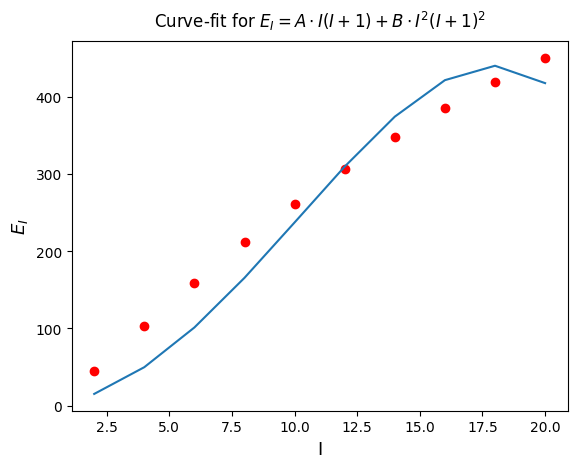

In [14]:
# Question 1.5

def E_I(I,A,B):
    return A*I*(I + 1) + B*(I**2)*(I+1)**2

E_array = np.array([44.54,102.8,159.0,211.7,260.5,305.8,347.3,385.0,419.3,450.2])
I_array = np.array([2,4,6,8,10,12,14,16,18,20])


A_guess = 1
B_guess = 1
param_guess = [A_guess, B_guess]
param, param_cov = curve_fit(E_I,I_array,E_array,p0=param_guess)
A,B = param
E_fit = A*I_array*(I_array + 1) + B*(I_array**2)*(I_array+1)**2


plt.plot(I_array, E_fit)
plt.scatter(I_array, E_array, color = 'r')

print('A = ',A)
print('B = ',B)
print('std_A = ', np.sqrt(param_cov[0,0]))
print('std_B = ', np.sqrt(param_cov[1,1]))
print('cov_AB = ', (param_cov[0,1]))

plt.xlabel(r"I", fontsize=13)
plt.ylabel(r"$E_I$", fontsize=13)
plt.title(r"Curve-fit for $E_I = A\cdot I (I+1) + B\cdot I^2 (I+1)^2$", fontsize=12, pad=10)

plt.savefig("EvsI_fit.jpg", dpi=600)
plt.show()

In [21]:
# Question 1.7

#----Tm165 and Er164---------#
I_tm165 = [11/2, 15/2, 19/2, 23/2, 27/2, 31/2]
E_tm165 = [285, 380, 459, 540, 585, 564]

I_er164 = [4, 6, 8, 10, 12, 14, 16]
E_er164 = [208.06, 314.95, 428.23, 476.27, 563.92, 619.77, 708.54]


#----Lu171 and Yb170---------#
I_lu171  = [11/2, 13/2, 15/2, 17/2, 19/2]
E_lu171 = [269.13, 318.0, 365.0, 410.0, 452.0]

I_yb170  = [ 4, 6, 8, 10]
E_yb170 = [193, 296, 390, 474]


# Ta177 / Hf176
I_ta177 = [ 11/2, 13/2, 15/2, 17/2, 19/2]
E_ta177 = [289, 340, 387, 431, 471]

I_hf176 = [4, 6, 8, 10]
E_hf176 = [202, 307, 401, 483]


# Re183 / W182
I_re183 = [11/2, 13/2, 15/2, 17/2, 19/2]
E_re183 = [332,397, 447, 500, 550]

I_w182 = [4, 6, 8, 10]
E_w182 = [229, 351, 464, 568]

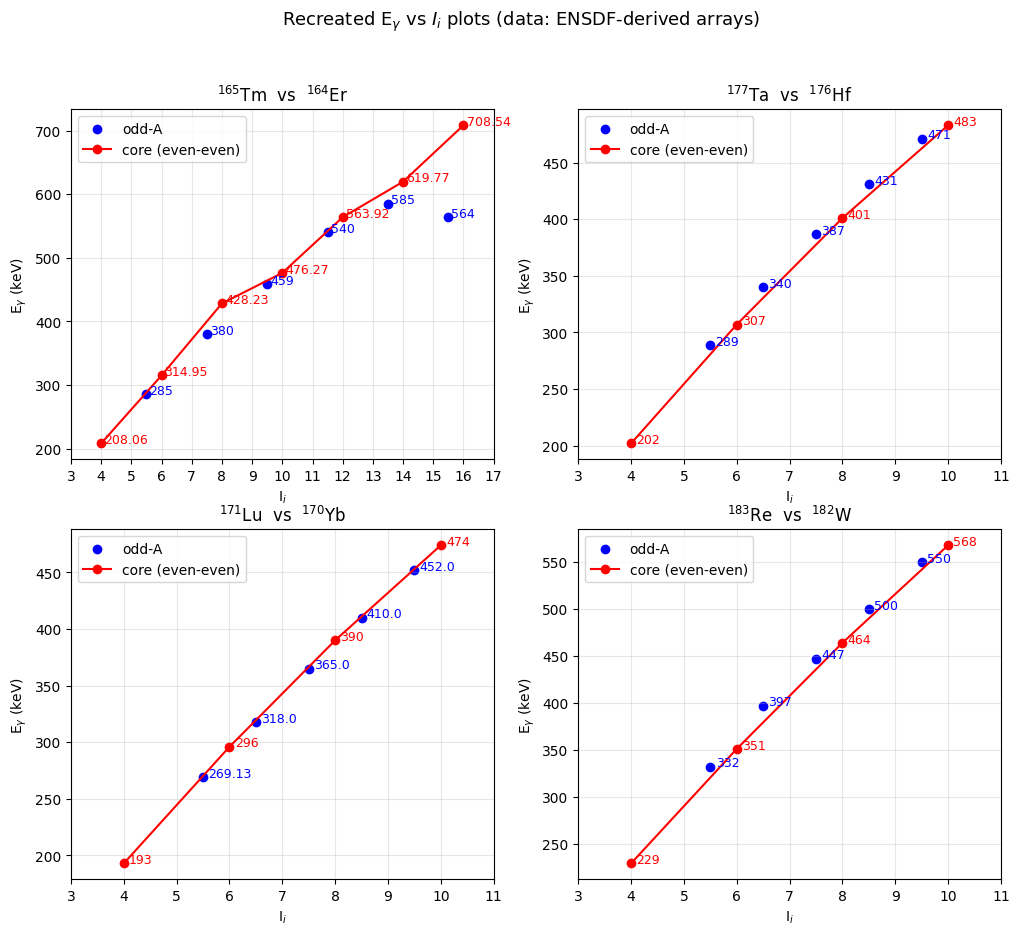

In [29]:
# Question 1.7

# -------------------- DATA --------------------

# Tm165 / Er164
I_tm165 = np.array([11/2, 15/2, 19/2, 23/2, 27/2, 31/2])
E_tm165 = np.array([285, 380, 459, 540, 585, 564])

I_er164 = np.array([4, 6, 8, 10, 12, 14, 16])
E_er164 = np.array([208.06, 314.95, 428.23, 476.27, 563.92, 619.77, 708.54])

# Lu171 / Yb170
I_lu171 = np.array([11/2, 13/2, 15/2, 17/2, 19/2])
E_lu171 = np.array([269.13, 318.0, 365.0, 410.0, 452.0])

I_yb170 = np.array([4, 6, 8, 10])
E_yb170 = np.array([193, 296, 390, 474])

# Ta177 / Hf176
I_ta177 = np.array([ 11/2, 13/2, 15/2, 17/2, 19/2])
E_ta177 = np.array([289, 340, 387, 431, 471])

I_hf176 = np.array([4, 6, 8, 10])
E_hf176 = np.array([202, 307, 401, 483])

# Re183 / W182
I_re183 = np.array([11/2, 13/2, 15/2, 17/2, 19/2])
E_re183 = np.array([332,397, 447, 500, 550])

I_w182 = np.array([4, 6, 8, 10])
E_w182 = np.array([229, 351, 464, 568])


# -------------------- PANEL FUNCTION --------------------

def panel(ax, I_odd, E_odd, I_core, E_core, title):
    # Blue scatter for odd-A nucleus
    ax.scatter(I_odd, E_odd, color='blue', label='odd-A')

    # Add blue text labels
    for x, y in zip(I_odd, E_odd):
        ax.text(x + 0.1, y, f"{y}", color='blue', fontsize=9)

    # Red scatter + red line for even-even core
    ax.plot(I_core, E_core, color='red', marker='o', label='core (even-even)')

    # Add red text labels
    for x, y in zip(I_core, E_core):
        ax.text(x + 0.1, y, f"{y}", color='red', fontsize=9)

    # Integer x ticks
    xmin = int(min(I_odd.min(), I_core.min())) - 1
    xmax = int(max(I_odd.max(), I_core.max())) + 1
    ax.set_xticks(np.arange(xmin, xmax+1, 1))

    ax.set_xlabel("I$_i$")
    ax.set_ylabel("E$_\\gamma$ (keV)")
    ax.set_title(title)
    ax.grid(alpha=0.3)
    ax.legend()


# -------------------- 2 × 2 PANEL --------------------

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

panel(axes[0,0], I_tm165, E_tm165, I_er164, E_er164, r"$^{165}$Tm  vs  $^{164}$Er")
panel(axes[0,1], I_ta177, E_ta177, I_hf176, E_hf176, r"$^{177}$Ta  vs  $^{176}$Hf")
panel(axes[1,0], I_lu171, E_lu171, I_yb170, E_yb170, r"$^{171}$Lu  vs  $^{170}$Yb")
panel(axes[1,1], I_re183, E_re183, I_w182, E_w182, r"$^{183}$Re  vs  $^{182}$W")


plt.suptitle("Recreated E$_\\gamma$ vs $I_i$ plots (data: ENSDF-derived arrays)", fontsize=13)
plt.savefig("7-2[404].png", dpi=600)
plt.show()
